## Sentiment Analysis of IKN 

### Data Source

https://twitter.com/search?q=ikn%20lang%3Aid&src=typed_query

### Task 

1. Bagaimana opini pengguna Twitter mengenai pemindahan Ibukota ke IKN

In [1]:
import pandas as pd

In [2]:
# Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Hide Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load Dataset

df = pd.read_excel(r"E:\PORTFOLIO\1. DATA ANALYTICS\4. IKN\DATA\IKN_Twitter_Opinion.xlsx")

In [7]:
df.head()

created_at        id_str  \
0  Sun Aug 27 23:56:17 +0000 2023  1.695948e+18   
1  Sun Aug 27 23:52:57 +0000 2023  1.695948e+18   
2  Sun Aug 27 23:48:05 +0000 2023  1.695946e+18   
3  Sun Aug 27 23:43:37 +0000 2023  1.695945e+18   
4  Sun Aug 27 23:39:00 +0000 2023  1.695944e+18   

                                           full_text  quote_count  \
0  @Malika6027 Bahasa kren nya muka bajingan ini ...            0   
1  Bangun Bandara VVIP di IKN, Kementerian PUPR S...            0   
2  Peluncuran buku The Road to Nusantara", refere...            0   
3  @yaniarsim @DPR_RI @mohmahfudmd Dari proyek IK...            0   
4  Daftar Titik Panas Sekitar IKN Nusantara, Pote...            0   

   reply_count  retweet_count  favorite_count lang   user_id_str  \
0            0              0               0   in  1.647761e+18   
1            1              0              16   in  1.531957e+18   
2            0              0               1   in  9.175630e+17   
3            0              0               0   in  5.991628e+07   
4            0              0               0   in  1.035512e+08   

   conversation_id_str         username  \
0         1.695689e+18  manukahoneyland   
1         1.695948e+18     yangmi3prnew   
2         1.695253e+18       najib_lipi   
3         1.695648e+18        Kang_eNeS   
4         1.695944e+18     tribunkaltim   

                                           tweet_url  
0  https://twitter.com/manukahoneyland/status/169...  
1  https://twitter.com/yangmi3prnew/status/169594...  
2  https://twitter.com/najib_lipi/status/16959463...  
3  https://twitter.com/Kang_eNeS/status/169594519...  
4  https://twitter.com/tribunkaltim/status/169594...

In [8]:
df.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

In [9]:
df.dtypes

created_at              object
id_str                 float64
full_text               object
quote_count              int64
reply_count              int64
retweet_count            int64
favorite_count           int64
lang                    object
user_id_str            float64
conversation_id_str    float64
username                object
tweet_url               object
dtype: object

### Text Analysis of Tweet 

In [10]:
#!pip install neattext

In [11]:
# Load Text Cleaning Package

import neattext.functions as nfx

In [12]:
# Methods

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### Noise 

1. Remove Mentions
2. Remove Hashtags
3. URLS
4. Emoticon
5. Special Char

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
df

created_at        id_str  \
0    Sun Aug 27 23:56:17 +0000 2023  1.695948e+18   
1    Sun Aug 27 23:52:57 +0000 2023  1.695948e+18   
2    Sun Aug 27 23:48:05 +0000 2023  1.695946e+18   
3    Sun Aug 27 23:43:37 +0000 2023  1.695945e+18   
4    Sun Aug 27 23:39:00 +0000 2023  1.695944e+18   
5    Sun Aug 27 23:38:35 +0000 2023  1.695944e+18   
6    Sun Aug 27 23:34:14 +0000 2023  1.695943e+18   
7    Sun Aug 27 23:23:21 +0000 2023  1.695940e+18   
8    Sun Aug 27 23:17:06 +0000 2023  1.695939e+18   
9    Sun Aug 27 23:15:24 +0000 2023  1.695938e+18   
10   Sun Aug 27 23:07:58 +0000 2023  1.695936e+18   
11   Sun Aug 27 23:04:42 +0000 2023  1.695935e+18   
12   Sun Aug 27 22:58:07 +0000 2023  1.695934e+18   
13   Sun Aug 27 22:57:37 +0000 2023  1.695934e+18   
14   Sun Aug 27 22:56:45 +0000 2023  1.695933e+18   
15   Sun Aug 27 22:55:59 +0000 2023  1.695933e+18   
16   Sun Aug 27 22:55:41 +0000 2023  1.695933e+18   
17   Sun Aug 27 22:54:37 +0000 2023  1.695933e+18   
18   Sun Aug 27 22:53:43 +0000 2023  1.695933e+18   
19   Sun Aug 27 22:47:21 +0000 2023  1.695931e+18   
20   Sun Aug 27 22:46:53 +0000 2023  1.695931e+18   
21   Sun Aug 27 22:41:23 +0000 2023  1.695930e+18   
22   Sun Aug 27 22:41:22 +0000 2023  1.695930e+18   
23   Sun Aug 27 22:41:17 +0000 2023  1.695930e+18   
24   Sun Aug 27 22:41:15 +0000 2023  1.695929e+18   
25   Sun Aug 27 22:41:09 +0000 2023  1.695929e+18   
26   Sun Aug 27 22:35:20 +0000 2023  1.695928e+18   
27   Sun Aug 27 22:34:42 +0000 2023  1.695928e+18   
28   Sun Aug 27 22:32:01 +0000 2023  1.695927e+18   
29   Sun Aug 27 21:07:30 +0000 2023  1.695906e+18   
30   Sun Aug 27 20:14:56 +0000 2023  1.695893e+18   
31   Sun Aug 27 18:17:21 +0000 2023  1.695863e+18   
32   Sun Aug 27 17:44:07 +0000 2023  1.695855e+18   
33   Sun Aug 27 17:36:11 +0000 2023  1.695853e+18   
34   Sun Aug 27 17:32:47 +0000 2023  1.695852e+18   
35   Sun Aug 27 17:31:55 +0000 2023  1.695852e+18   
36   Sun Aug 27 17:30:39 +0000 2023  1.695851e+18   
37   Sun Aug 27 17:11:37 +0000 2023  1.695847e+18   
38   Sun Aug 27 17:00:37 +0000 2023  1.695844e+18   
39   Sun Aug 27 16:58:14 +0000 2023  1.695843e+18   
40   Sun Aug 27 16:51:26 +0000 2023  1.695841e+18   
41   Sun Aug 27 16:40:09 +0000 2023  1.695839e+18   
42   Sun Aug 27 16:37:35 +0000 2023  1.695838e+18   
43   Sun Aug 27 16:30:12 +0000 2023  1.695836e+18   
44   Sun Aug 27 16:29:54 +0000 2023  1.695836e+18   
45   Sun Aug 27 16:24:37 +0000 2023  1.695835e+18   
46   Sun Aug 27 16:05:04 +0000 2023  1.695830e+18   
47   Sun Aug 27 15:58:10 +0000 2023  1.695828e+18   
48   Sun Aug 27 15:35:55 +0000 2023  1.695822e+18   
49   Sun Aug 27 15:26:11 +0000 2023  1.695820e+18   
50   Sun Aug 27 15:25:22 +0000 2023  1.695820e+18   
51   Sun Aug 27 15:11:04 +0000 2023  1.695816e+18   
52   Sun Aug 27 15:09:16 +0000 2023  1.695816e+18   
53   Sun Aug 27 15:08:51 +0000 2023  1.695816e+18   
54   Sun Aug 27 14:59:34 +0000 2023  1.695813e+18   
55   Sun Aug 27 14:52:18 +0000 2023  1.695811e+18   
56   Sun Aug 27 14:43:19 +0000 2023  1.695809e+18   
57   Sun Aug 27 14:42:08 +0000 2023  1.695809e+18   
58   Sun Aug 27 14:29:07 +0000 2023  1.695806e+18   
59   Sun Aug 27 14:22:34 +0000 2023  1.695804e+18   
60   Sun Aug 27 14:19:53 +0000 2023  1.695803e+18   
61   Sun Aug 27 14:07:50 +0000 2023  1.695800e+18   
62   Sun Aug 27 14:07:39 +0000 2023  1.695800e+18   
63   Sun Aug 27 14:04:09 +0000 2023  1.695799e+18   
64   Sun Aug 27 14:03:31 +0000 2023  1.695799e+18   
65   Sun Aug 27 13:59:04 +0000 2023  1.695798e+18   
66   Sun Aug 27 13:56:16 +0000 2023  1.695797e+18   
67   Sun Aug 27 13:54:39 +0000 2023  1.695797e+18   
68   Sun Aug 27 13:53:37 +0000 2023  1.695797e+18   
69   Sun Aug 27 13:52:12 +0000 2023  1.695796e+18   
70   Sun Aug 27 13:29:34 +0000 2023  1.695791e+18   
71   Sun Aug 27 13:29:11 +0000 2023  1.695791e+18   
72   Sun Aug 27 13:22:38 +0000 2023  1.695789e+18   
73   Sun Aug 27 13:12:32 +0000 2023  1.695786e+18   
74   Sun Aug 27 13:10:07 +0000 2023  1.695786e+18 

In [15]:
df['full_text'].apply(nfx.extract_hashtags)

0                                                     []
1                                                     []
2                                                     []
3                                                     []
4      [#IKN, #IKNNusantara, #IbuKotaNegara, #IbuKota...
5                                                     []
6                                                     []
7                                                     []
8                                                     []
9                                                     []
10                                                    []
11                                                    []
12       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
13       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
14       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
15       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
16       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
17       [#IbukotaNegara, #IKNN

In [16]:
df['extracted_hashtags'] = df['full_text'].apply(nfx.extract_hashtags)

In [17]:
df['extracted_hashtags']

0                                                     []
1                                                     []
2                                                     []
3                                                     []
4      [#IKN, #IKNNusantara, #IbuKotaNegara, #IbuKota...
5                                                     []
6                                                     []
7                                                     []
8                                                     []
9                                                     []
10                                                    []
11                                                    []
12       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
13       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
14       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
15       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
16       [#IbukotaNegara, #IKNNusantara, #PindahIbuKota]
17       [#IbukotaNegara, #IKNN

In [43]:
# Cleaning Text
df['clean_tweet'] = df['full_text'].apply(nfx.remove_hashtags)

In [44]:
df[['full_text','clean_tweet']]

full_text  \
0    @Malika6027 Bahasa kren nya muka bajingan ini ...   
1    Bangun Bandara VVIP di IKN, Kementerian PUPR S...   
2    Peluncuran buku The Road to Nusantara", refere...   
3    @yaniarsim @DPR_RI @mohmahfudmd Dari proyek IK...   
4    Daftar Titik Panas Sekitar IKN Nusantara, Pote...   
5    KemenPUPR menargetkan pembangunan 47 tower rus...   
6                         @Hansunriko Nah. IKNðŸ‘ðŸ‘   
7                    @Yulia_NS79 IKN NusantaraðŸ‘ðŸ‘   
8    @MardaniAliSera @DPR_RI @FPKSDPRRI @PKSejahter...   
9    Tol Ikn Bandara Tempat ibadah Patung Gapura ??...   
10                   Kan sdh diserahkan tuh lokasi ikn   
11   @alexanderdrspan Aku setuju Sama IKN, buatku I...   
12   Kementerian PUPR Pastikan Tak Ada Tenaga Kerja...   
13   Percepatan pembangunan di kawasan Ibu Kota Nus...   
14   Kementerian PUPR melalui Satgas Pelaksanaan Pe...   
15   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
16   Bendungan Sepaku Semoi di IKN Nusantara Akan D...   
17   Kementerian PUPR mengungkapkan Bedungan Sepaku...   
18   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
19   Kementerian PUPR: Proyek IKN Serap 9.713 Peker...   
20   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
21   Di Jakarta PNS tdk dapat rumah tdk ada yg ribu...   
22   OIKN melalui Kedeputian Sosial, Budaya, dan Pe...   
23   Pertumbuhan Ekonomi ASEAN Jadi Titik Terang Gl...   
24   @pengarang_sajak Beli barang Rusia atau Cina k...   
25   PNS di IKN harus rela berbagi kamar dan alasan...   
26   @BangPakatDayak IKN akan berkembang bersama ke...   
27   @BangPakatDayak IKN akan berkembang bersama ke...   
28   @MARQUEZ__93 IKN akan berkembang bersama keari...   
29   Lebih baik hidup sederhana &amp  mensyukuri ap...   
30   @linda_gunawan @AyatMamas @BangPakatDayak Ya e...   
31   Demokrat biasa jago subsidi dan korupsi bangun...   
32   IKN adalah kuburan dan baru nisan bagi Jokowi ...   
33   IKN Era Baru Pembangunan Indonesia  #DukungIKN...   
34   @barcastuff_idn Maap roberto suruh ke IKN aja ...   
35   @jalur5_ Ini salah satu cara agar supaya bisni...   
36   @adriansyahyasin Semoga IKN ngambil contoh ke ...   
37   @Jatayu_45 @dedidarmawan191 Tentu menaikan BBM...   
38       @GerryS menunggu f-15 geber diatas istana IKN   
39   Dan manusia manusia sampah membangga-banggakan...   
40   Sedih banget w baca komen di tktok tdi tntg ik...   
41   @bachrum_achmadi IKN aja kalian ributinâ€¦ sok...   
42   @Wawat_Kurniawan @aniesbaswedan 1. Ucapan baji...   
43   Hore cebong sorak hutang tambah 1.250 trilyun ...   
44   @boyfebtuju @Anak__Ogi Intinya yg 2 itu pasti ...   
45   @dennyindrayana Melacurkan gelar akibat sebuah...   
46   Presiden Hebat itu Bernama @jokowi Eksekutor h...   
47   SBY mau buat Asian Games, yang eksekusi Jokowi...   
48   @Miduk17 Dan hadiah HUT RI kali ini sangat spe...   
49   @bachrum_achmadi Ga usah bacot kau lae tentang...   
50   Ga paham apa tujuan bangun IKN ini di tengah b...   
51   @msaid_didu Kong Didu kok gak sebutin IKN?  Be...   
52   @Ust_Alansyah @jokowi Lu tau konsepnya IKN ngg...   
53   @dhemit_is_back Mestilah untung bang ,dari tam...   
54                  @___hazelenglish Iyanih gegara IKN   
55       @bonbonbaby007 Omg. Bilibili ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£   
56   @jakfest1 @adriansyahyasin Kalau ikn jadi bisa...   
57   @kimi198021 @ch_chotimah2 @ganjarpranowo Laaaa...   
58   @CNNIndonesia Aturan mainnya bagaimana ini?  -...   
59   Isu Polusi Udara Jakarta Untuk Muluskan Proyek...   
60    @PartaiSocmed Presiden Jokowi batal bangun IKN??   
61   @strike_bravo_b @PNS_Ababil Yo yg mau tukeran ...   
62   Bahaya, Titik Panas Dampak Tambang Batu Bara I...   
63   Otorita Ibu Kota Nusantara saat ini sedang fok...   
64   @marimassachet Kamu nanti ikut pindah ke ikn g...   
65   Kementerian PUPR telah menyiapkan anggaran seb...   
66   @dita_wr Itu gak mau disuruh berhenti dulu apa...   
67   Isu Udara Jakarta Ramai Dibahas, Kepentingan O...   
68   @kumparan Hahaha, syahwat ikn yg ngawu

In [45]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [46]:
df[['full_text', 'clean_tweet']]

full_text  \
0    @Malika6027 Bahasa kren nya muka bajingan ini ...   
1    Bangun Bandara VVIP di IKN, Kementerian PUPR S...   
2    Peluncuran buku The Road to Nusantara", refere...   
3    @yaniarsim @DPR_RI @mohmahfudmd Dari proyek IK...   
4    Daftar Titik Panas Sekitar IKN Nusantara, Pote...   
5    KemenPUPR menargetkan pembangunan 47 tower rus...   
6                         @Hansunriko Nah. IKNðŸ‘ðŸ‘   
7                    @Yulia_NS79 IKN NusantaraðŸ‘ðŸ‘   
8    @MardaniAliSera @DPR_RI @FPKSDPRRI @PKSejahter...   
9    Tol Ikn Bandara Tempat ibadah Patung Gapura ??...   
10                   Kan sdh diserahkan tuh lokasi ikn   
11   @alexanderdrspan Aku setuju Sama IKN, buatku I...   
12   Kementerian PUPR Pastikan Tak Ada Tenaga Kerja...   
13   Percepatan pembangunan di kawasan Ibu Kota Nus...   
14   Kementerian PUPR melalui Satgas Pelaksanaan Pe...   
15   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
16   Bendungan Sepaku Semoi di IKN Nusantara Akan D...   
17   Kementerian PUPR mengungkapkan Bedungan Sepaku...   
18   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
19   Kementerian PUPR: Proyek IKN Serap 9.713 Peker...   
20   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
21   Di Jakarta PNS tdk dapat rumah tdk ada yg ribu...   
22   OIKN melalui Kedeputian Sosial, Budaya, dan Pe...   
23   Pertumbuhan Ekonomi ASEAN Jadi Titik Terang Gl...   
24   @pengarang_sajak Beli barang Rusia atau Cina k...   
25   PNS di IKN harus rela berbagi kamar dan alasan...   
26   @BangPakatDayak IKN akan berkembang bersama ke...   
27   @BangPakatDayak IKN akan berkembang bersama ke...   
28   @MARQUEZ__93 IKN akan berkembang bersama keari...   
29   Lebih baik hidup sederhana &amp  mensyukuri ap...   
30   @linda_gunawan @AyatMamas @BangPakatDayak Ya e...   
31   Demokrat biasa jago subsidi dan korupsi bangun...   
32   IKN adalah kuburan dan baru nisan bagi Jokowi ...   
33   IKN Era Baru Pembangunan Indonesia  #DukungIKN...   
34   @barcastuff_idn Maap roberto suruh ke IKN aja ...   
35   @jalur5_ Ini salah satu cara agar supaya bisni...   
36   @adriansyahyasin Semoga IKN ngambil contoh ke ...   
37   @Jatayu_45 @dedidarmawan191 Tentu menaikan BBM...   
38       @GerryS menunggu f-15 geber diatas istana IKN   
39   Dan manusia manusia sampah membangga-banggakan...   
40   Sedih banget w baca komen di tktok tdi tntg ik...   
41   @bachrum_achmadi IKN aja kalian ributinâ€¦ sok...   
42   @Wawat_Kurniawan @aniesbaswedan 1. Ucapan baji...   
43   Hore cebong sorak hutang tambah 1.250 trilyun ...   
44   @boyfebtuju @Anak__Ogi Intinya yg 2 itu pasti ...   
45   @dennyindrayana Melacurkan gelar akibat sebuah...   
46   Presiden Hebat itu Bernama @jokowi Eksekutor h...   
47   SBY mau buat Asian Games, yang eksekusi Jokowi...   
48   @Miduk17 Dan hadiah HUT RI kali ini sangat spe...   
49   @bachrum_achmadi Ga usah bacot kau lae tentang...   
50   Ga paham apa tujuan bangun IKN ini di tengah b...   
51   @msaid_didu Kong Didu kok gak sebutin IKN?  Be...   
52   @Ust_Alansyah @jokowi Lu tau konsepnya IKN ngg...   
53   @dhemit_is_back Mestilah untung bang ,dari tam...   
54                  @___hazelenglish Iyanih gegara IKN   
55       @bonbonbaby007 Omg. Bilibili ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£   
56   @jakfest1 @adriansyahyasin Kalau ikn jadi bisa...   
57   @kimi198021 @ch_chotimah2 @ganjarpranowo Laaaa...   
58   @CNNIndonesia Aturan mainnya bagaimana ini?  -...   
59   Isu Polusi Udara Jakarta Untuk Muluskan Proyek...   
60    @PartaiSocmed Presiden Jokowi batal bangun IKN??   
61   @strike_bravo_b @PNS_Ababil Yo yg mau tukeran ...   
62   Bahaya, Titik Panas Dampak Tambang Batu Bara I...   
63   Otorita Ibu Kota Nusantara saat ini sedang fok...   
64   @marimassachet Kamu nanti ikut pindah ke ikn g...   
65   Kementerian PUPR telah menyiapkan anggaran seb...   
66   @dita_wr Itu gak mau disuruh berhenti dulu apa...   
67   Isu Udara Jakarta Ramai Dibahas, Kepentingan O...   
68   @kumparan Hahaha, syahwat ikn yg ngawu

In [47]:
# Remove Special Characters

df['clean_tweet'] = df['full_text'].apply(nfx.remove_special_characters)

In [48]:
df[['full_text', 'clean_tweet']]

full_text  \
0    @Malika6027 Bahasa kren nya muka bajingan ini ...   
1    Bangun Bandara VVIP di IKN, Kementerian PUPR S...   
2    Peluncuran buku The Road to Nusantara", refere...   
3    @yaniarsim @DPR_RI @mohmahfudmd Dari proyek IK...   
4    Daftar Titik Panas Sekitar IKN Nusantara, Pote...   
5    KemenPUPR menargetkan pembangunan 47 tower rus...   
6                         @Hansunriko Nah. IKNðŸ‘ðŸ‘   
7                    @Yulia_NS79 IKN NusantaraðŸ‘ðŸ‘   
8    @MardaniAliSera @DPR_RI @FPKSDPRRI @PKSejahter...   
9    Tol Ikn Bandara Tempat ibadah Patung Gapura ??...   
10                   Kan sdh diserahkan tuh lokasi ikn   
11   @alexanderdrspan Aku setuju Sama IKN, buatku I...   
12   Kementerian PUPR Pastikan Tak Ada Tenaga Kerja...   
13   Percepatan pembangunan di kawasan Ibu Kota Nus...   
14   Kementerian PUPR melalui Satgas Pelaksanaan Pe...   
15   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
16   Bendungan Sepaku Semoi di IKN Nusantara Akan D...   
17   Kementerian PUPR mengungkapkan Bedungan Sepaku...   
18   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
19   Kementerian PUPR: Proyek IKN Serap 9.713 Peker...   
20   Bendungan Sepaku Semoi IKN Bakal Dilengkapi PL...   
21   Di Jakarta PNS tdk dapat rumah tdk ada yg ribu...   
22   OIKN melalui Kedeputian Sosial, Budaya, dan Pe...   
23   Pertumbuhan Ekonomi ASEAN Jadi Titik Terang Gl...   
24   @pengarang_sajak Beli barang Rusia atau Cina k...   
25   PNS di IKN harus rela berbagi kamar dan alasan...   
26   @BangPakatDayak IKN akan berkembang bersama ke...   
27   @BangPakatDayak IKN akan berkembang bersama ke...   
28   @MARQUEZ__93 IKN akan berkembang bersama keari...   
29   Lebih baik hidup sederhana &amp  mensyukuri ap...   
30   @linda_gunawan @AyatMamas @BangPakatDayak Ya e...   
31   Demokrat biasa jago subsidi dan korupsi bangun...   
32   IKN adalah kuburan dan baru nisan bagi Jokowi ...   
33   IKN Era Baru Pembangunan Indonesia  #DukungIKN...   
34   @barcastuff_idn Maap roberto suruh ke IKN aja ...   
35   @jalur5_ Ini salah satu cara agar supaya bisni...   
36   @adriansyahyasin Semoga IKN ngambil contoh ke ...   
37   @Jatayu_45 @dedidarmawan191 Tentu menaikan BBM...   
38       @GerryS menunggu f-15 geber diatas istana IKN   
39   Dan manusia manusia sampah membangga-banggakan...   
40   Sedih banget w baca komen di tktok tdi tntg ik...   
41   @bachrum_achmadi IKN aja kalian ributinâ€¦ sok...   
42   @Wawat_Kurniawan @aniesbaswedan 1. Ucapan baji...   
43   Hore cebong sorak hutang tambah 1.250 trilyun ...   
44   @boyfebtuju @Anak__Ogi Intinya yg 2 itu pasti ...   
45   @dennyindrayana Melacurkan gelar akibat sebuah...   
46   Presiden Hebat itu Bernama @jokowi Eksekutor h...   
47   SBY mau buat Asian Games, yang eksekusi Jokowi...   
48   @Miduk17 Dan hadiah HUT RI kali ini sangat spe...   
49   @bachrum_achmadi Ga usah bacot kau lae tentang...   
50   Ga paham apa tujuan bangun IKN ini di tengah b...   
51   @msaid_didu Kong Didu kok gak sebutin IKN?  Be...   
52   @Ust_Alansyah @jokowi Lu tau konsepnya IKN ngg...   
53   @dhemit_is_back Mestilah untung bang ,dari tam...   
54                  @___hazelenglish Iyanih gegara IKN   
55       @bonbonbaby007 Omg. Bilibili ðŸ¤£ðŸ¤£ðŸ¤£ðŸ¤£   
56   @jakfest1 @adriansyahyasin Kalau ikn jadi bisa...   
57   @kimi198021 @ch_chotimah2 @ganjarpranowo Laaaa...   
58   @CNNIndonesia Aturan mainnya bagaimana ini?  -...   
59   Isu Polusi Udara Jakarta Untuk Muluskan Proyek...   
60    @PartaiSocmed Presiden Jokowi batal bangun IKN??   
61   @strike_bravo_b @PNS_Ababil Yo yg mau tukeran ...   
62   Bahaya, Titik Panas Dampak Tambang Batu Bara I...   
63   Otorita Ibu Kota Nusantara saat ini sedang fok...   
64   @marimassachet Kamu nanti ikut pindah ke ikn g...   
65   Kementerian PUPR telah menyiapkan anggaran seb...   
66   @dita_wr Itu gak mau disuruh berhenti dulu apa...   
67   Isu Udara Jakarta Ramai Dibahas, Kepentingan O...   
68   @kumparan Hahaha, syahwat ikn yg ngawu

### Sentiment Analysis

In [49]:
from textblob import TextBlob

In [51]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [52]:
# Text

ex1 = df['clean_tweet'].iloc[0]

In [53]:
get_sentiment(ex1)

{'polarity': 0.2, 'subjectivity': 0.3, 'sentiment': 'Positive'}

In [54]:
df['sentiment_result'] = df['clean_tweet'].apply(get_sentiment)

In [56]:
df['sentiment_result']

0      {'polarity': 0.2, 'subjectivity': 0.3, 'sentim...
1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5      {'polarity': -0.1, 'subjectivity': 0.6, 'senti...
6      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
7      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
8      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
9      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
10     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
11     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
12     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
13     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
14     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
15     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
16     {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
17     {'polarity': 0.0, 'subje

In [59]:
df['sentiment_result'].iloc[12]

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [61]:
pd.json_normalize(df['sentiment_result'].iloc[5])

polarity  subjectivity sentiment
0      -0.1           0.6  Negative

In [62]:
df = df.join(pd.json_normalize(df['sentiment_result']))

In [63]:
df.head(10)

created_at        id_str  \
0  Sun Aug 27 23:56:17 +0000 2023  1.695948e+18   
1  Sun Aug 27 23:52:57 +0000 2023  1.695948e+18   
2  Sun Aug 27 23:48:05 +0000 2023  1.695946e+18   
3  Sun Aug 27 23:43:37 +0000 2023  1.695945e+18   
4  Sun Aug 27 23:39:00 +0000 2023  1.695944e+18   
5  Sun Aug 27 23:38:35 +0000 2023  1.695944e+18   
6  Sun Aug 27 23:34:14 +0000 2023  1.695943e+18   
7  Sun Aug 27 23:23:21 +0000 2023  1.695940e+18   
8  Sun Aug 27 23:17:06 +0000 2023  1.695939e+18   
9  Sun Aug 27 23:15:24 +0000 2023  1.695938e+18   

                                           full_text  quote_count  \
0  @Malika6027 Bahasa kren nya muka bajingan ini ...            0   
1  Bangun Bandara VVIP di IKN, Kementerian PUPR S...            0   
2  Peluncuran buku The Road to Nusantara", refere...            0   
3  @yaniarsim @DPR_RI @mohmahfudmd Dari proyek IK...            0   
4  Daftar Titik Panas Sekitar IKN Nusantara, Pote...            0   
5  KemenPUPR menargetkan pembangunan 47 tower rus...            1   
6                       @Hansunriko Nah. IKNðŸ‘ðŸ‘            0   
7                  @Yulia_NS79 IKN NusantaraðŸ‘ðŸ‘            0   
8  @MardaniAliSera @DPR_RI @FPKSDPRRI @PKSejahter...            0   
9  Tol Ikn Bandara Tempat ibadah Patung Gapura ??...            0   

   reply_count  retweet_count  favorite_count lang   user_id_str  \
0            0              0               0   in  1.647761e+18   
1            1              0              16   in  1.531957e+18   
2            0              0               1   in  9.175630e+17   
3            0              0               0   in  5.991628e+07   
4            0              0               0   in  1.035512e+08   
5            2             14              14   in  2.580861e+09   
6            0              0               0   in  1.371339e+18   
7            0              0               1   in  1.371339e+18   
8            0              0               0   in  8.933202e+08   
9            0              0               0   in  1.529675e+18   

   conversation_id_str         username  \
0         1.695689e+18  manukahoneyland   
1         1.695948e+18     yangmi3prnew   
2         1.695253e+18       najib_lipi   
3         1.695648e+18        Kang_eNeS   
4         1.695944e+18     tribunkaltim   
5         1.695944e+18      bamantara00   
6         1.695930e+18          AliBej0   
7         1.695929e+18          AliBej0   
8         1.693572e+18      edyalfendy1   
9         1.695938e+18         Hotklamp   

                                           tweet_url  \
0  https://twitter.com/manukahoneyland/status/169...   
1  https://twitter.com/yangmi3prnew/status/169594...   
2  https://twitter.com/najib_lipi/status/16959463...   
3  https://twitter.com/Kang_eNeS/status/169594519...   
4  https://twitter.com/tribunkaltim/status/169594...   
5  https://twitter.com/bamantara00/status/1695943...   
6  https://twitter.com/AliBej0/status/16959428293...   
7  https://twitter.com/AliBej0/status/16959400899...   
8  https://twitter.com/edyalfendy1/status/1695938...   
9  https://twitter.com/Hotklamp/status/1695938088...   

                                  extracted_hashtags  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [#IKN, #IKNNusantara, #IbuKotaNegara, #IbuKota...   
5                                                 []   
6                                                 []   
7                                                 []   
8                                                 []   
9                                                 []   

                                         clean_tweet  \
0  Malika6027 Bahasa kren nya muka bajingan ini  ...   
1  Bangun Bandara VVIP di IKN Kementerian PUPR Si...   
2  Peluncuran buku The Road to Nusantara referens...   
3  yaniarsim DPRRI m

In [64]:
df['sentiment'].value_counts()

Neutral     694
Positive     27
Negative     13
Name: sentiment, dtype: int64

<AxesSubplot:>

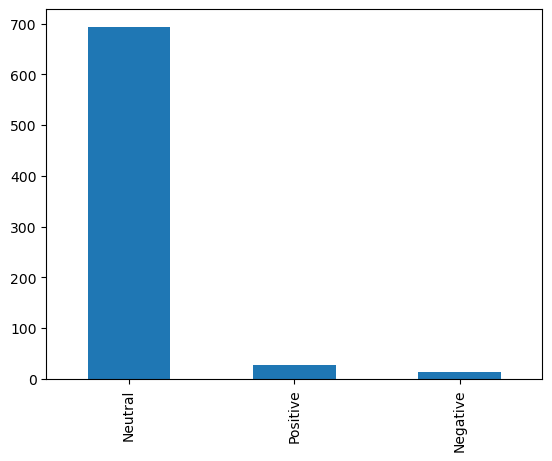

In [65]:
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

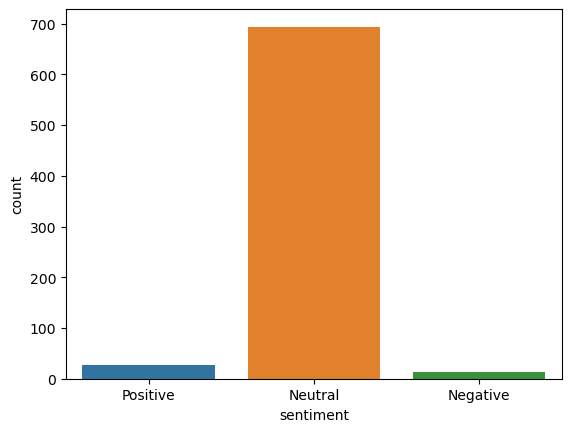

In [66]:
sns.countplot(df['sentiment'])

In [ ]:
### Keyword Extraction
+ For Positive and Negative Sentiment
+ General

In [68]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']

In [70]:
negative_tweet

5      KemenPUPR menargetkan pembangunan 47 tower rus...
153    IKN adalah Proyek Paling idiot sepanjang masa ...
186      Duh Proyek Jembatan Penghubung IKN di Kalima...
277    PNSAbabil kalian ke ikn  beberapa mah udah pad...
356    Melihat Mess Pampres di Ikn Nusantara kini tel...
376    jokowi Hanya sekedar mengingatkan   IKJ Ibu Ko...
444    Panjangnya 76 Km Ternyata Proyek Jembatan 17 T...
446    Dana Bikin Hunian PNS di IKN Kurang Abdi Negar...
447    Duh IKN Nusantara Kekurangan 8000 Rumah untuk ...
476    untuk saat ini karena masih single dan baru jd...
541    Dan ya bukan cuman pusat pemerintahan yang pin...
545    kumparan Tp punya keunggulan Nanti klo ketrima...
693    worksfess Ambil benefitnya kakkalo disediain c...
Name: clean_tweet, dtype: object

In [71]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [72]:
positive_tweet_list

['Malika6027 Bahasa kren nya muka bajingan ini monkeys faces dickhead haha kirim ke IKN biar tinggal dg saudaranya orang hutan',
 'lindagunawan AyatMamas BangPakatDayak Ya elah baru master plantiap project juga di master plan nya pasti wow pas kenyataanya gak bakal sama Gw dukung dah ikn jadi biar gw kesampaian bisa naik mobil terbang wkwkwkkwkwk',
 'kumparan Hahaha syahwat ikn yg ngawur yg kena imbasnya asn macam kandang ayam diisi 6 org udah gaji alakadarnya',
 'ckabis Wkwkwkwkwk gw sama suami nyempil lah ber2 asli menurut gw kanwil kalbar amp kpknl ponti tuh paling worth deh buat di luar jawa daripada IKN',
 'strikebravob PNSAbabil Justru aku mau ke IKN sih hahaha mumpung masih lajang nih jadi pengen suasana baru',
 'IKN Nusantara akan berkonsep Smart City yang mengedepankan teknologi IKNPemerataanEkonomi IKNSejahterakanIndonesia IKN IKNtingkatkanKesejahteraan dukungproyekIKN IKNNusantara httpstcorkagVGp9M4',
 'IKN Nusantara akan menjadi kebanggaan semua masyarakat Indonesia dengan 

In [73]:
# Tokenization
for line in positive_tweet_list:
    # Print (line)
        for token in line.split():
            print(token)

Malika6027
Bahasa
kren
nya
muka
bajingan
ini
monkeys
faces
dickhead
haha
kirim
ke
IKN
biar
tinggal
dg
saudaranya
orang
hutan
lindagunawan
AyatMamas
BangPakatDayak
Ya
elah
baru
master
plantiap
project
juga
di
master
plan
nya
pasti
wow
pas
kenyataanya
gak
bakal
sama
Gw
dukung
dah
ikn
jadi
biar
gw
kesampaian
bisa
naik
mobil
terbang
wkwkwkkwkwk
kumparan
Hahaha
syahwat
ikn
yg
ngawur
yg
kena
imbasnya
asn
macam
kandang
ayam
diisi
6
org
udah
gaji
alakadarnya
ckabis
Wkwkwkwkwk
gw
sama
suami
nyempil
lah
ber2
asli
menurut
gw
kanwil
kalbar
amp
kpknl
ponti
tuh
paling
worth
deh
buat
di
luar
jawa
daripada
IKN
strikebravob
PNSAbabil
Justru
aku
mau
ke
IKN
sih
hahaha
mumpung
masih
lajang
nih
jadi
pengen
suasana
baru
IKN
Nusantara
akan
berkonsep
Smart
City
yang
mengedepankan
teknologi
IKNPemerataanEkonomi
IKNSejahterakanIndonesia
IKN
IKNtingkatkanKesejahteraan
dukungproyekIKN
IKNNusantara
httpstcorkagVGp9M4
IKN
Nusantara
akan
menjadi
kebanggaan
semua
masyarakat
Indonesia
dengan
melihat
kecanggihan
pemban

In [74]:
pos_tokens = [token for line in positive_tweet_list for token in line.split()]

In [75]:
neg_tokens = [token for line in negative_tweet_list for token in line.split()]
neu_tokens = [token for line in neutral_tweet_list for token in line.split()]

In [76]:
neg_tokens

['KemenPUPR',
 'menargetkan',
 'pembangunan',
 '47',
 'tower',
 'rusun',
 'ASN',
 'di',
 'IKN',
 'Nusantara',
 'selesai',
 'pd',
 'akhir',
 '2024',
 'Pada',
 'Juli',
 '2024',
 'ditargetkan',
 'minimal',
 'sudah',
 'ada',
 '12',
 'tower',
 'rusun',
 'ASN',
 'IKN',
 'yg',
 'telah',
 'selesai',
 'terbangun',
 'fully',
 'furnished',
 'dan',
 'siap',
 'untuk',
 'dihuni',
 'oleh',
 'para',
 'ASN',
 'Mantap',
 'Gus',
 'Paspampres',
 'Tidur',
 'Kebangun',
 'httpstcoaSj7SXjyi2',
 'IKN',
 'adalah',
 'Proyek',
 'Paling',
 'idiot',
 'sepanjang',
 'masa',
 'cc',
 'jokowi',
 'Duh',
 'Proyek',
 'Jembatan',
 'Penghubung',
 'IKN',
 'di',
 'Kalimantan',
 'Timur',
 'Senilai',
 'Rp',
 '17',
 'Triliun',
 'Mangkrak',
 'httpstcoZiqrrtzOpY',
 'PNSAbabil',
 'kalian',
 'ke',
 'ikn',
 'beberapa',
 'mah',
 'udah',
 'pada',
 'remote',
 'ada',
 'yang',
 'dilaut',
 '3',
 'bulan',
 'patroli',
 'gaji',
 'gitu',
 'gitu',
 'aja',
 'Melihat',
 'Mess',
 'Pampres',
 'di',
 'Ikn',
 'Nusantara',
 'kini',
 'telah',
 'berdiri'

In [77]:
# Get Most Commonest Keywords
from collections import Counter

In [78]:
def get_tokens(docx, num=30) :
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [79]:
get_tokens(pos_tokens)

{'IKN': 38,
 'Nusantara': 18,
 'di': 15,
 'pembangunan': 9,
 'akan': 8,
 'IKNPemerataanEkonomi': 8,
 'Indonesia': 8,
 'city': 8,
 'berkonsep': 7,
 'IKNSejahterakanIndonesia': 7,
 'IKNtingkatkanKesejahteraan': 7,
 'dukungproyekIKN': 7,
 'IKNNusantara': 7,
 'dengan': 7,
 'smart': 7,
 'ke': 6,
 'menjadi': 6,
 'kebanggaan': 6,
 'semua': 6,
 'masyarakat': 6,
 'melihat': 6,
 'kecanggihan': 6,
 'ini': 4,
 'jadi': 4,
 'yg': 4,
 'amp': 4,
 'pemerintah': 4,
 'upaya': 4,
 'ikn': 3,
 'gw': 3}

In [80]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neu_words = get_tokens(neu_tokens)

In [85]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(), columns=['words','scores'])

In [86]:
pos_df

words  scores
0                          IKN      38
1                    Nusantara      18
2                           di      15
3                  pembangunan       9
4                         akan       8
5         IKNPemerataanEkonomi       8
6                    Indonesia       8
7                         city       8
8                    berkonsep       7
9     IKNSejahterakanIndonesia       7
10  IKNtingkatkanKesejahteraan       7
11             dukungproyekIKN       7
12                IKNNusantara       7
13                      dengan       7
14                       smart       7
15                          ke       6
16                     menjadi       6
17                  kebanggaan       6
18                       semua       6
19                  masyarakat       6
20                     melihat       6
21                 kecanggihan       6
22                         ini       4
23                        jadi       4
24                          yg       4
25                         amp       4
26                  pemerintah       4
27                       upaya       4
28                         ikn       3
29                          gw       3

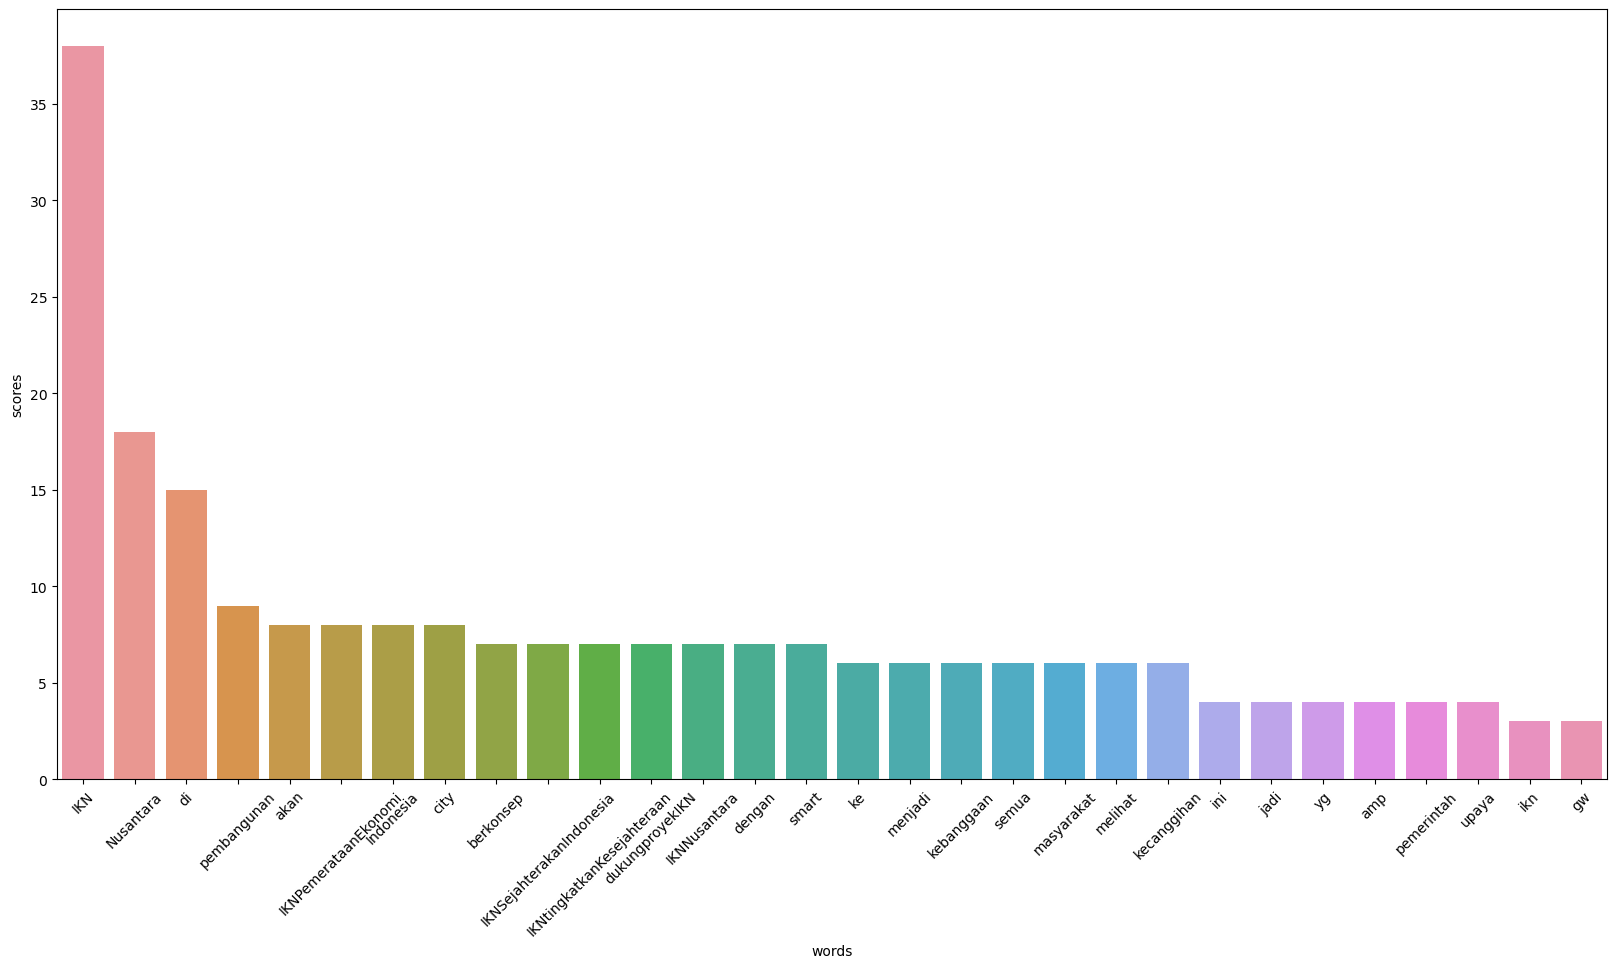

In [87]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores', data=pos_df)
plt.xticks(rotation=45)
plt.show()

In [88]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(), columns=['words','scores'])

In [89]:
neg_df

words  scores
0          IKN      10
1           di       6
2           yg       6
3          ASN       5
4    Nusantara       5
5          dan       5
6        untuk       4
7       Proyek       3
8           ke       3
9       Negara       3
10       tower       2
11       rusun       2
12     selesai       2
13        2024       2
14         ada       2
15       telah       2
16        siap       2
17        para       2
18      adalah       2
19      jokowi       2
20         Duh       2
21    Jembatan       2
22  Penghubung       2
23  Kalimantan       2
24       Timur       2
25          17       2
26     Triliun       2
27    Mangkrak       2
28        udah       2
29        yang       2

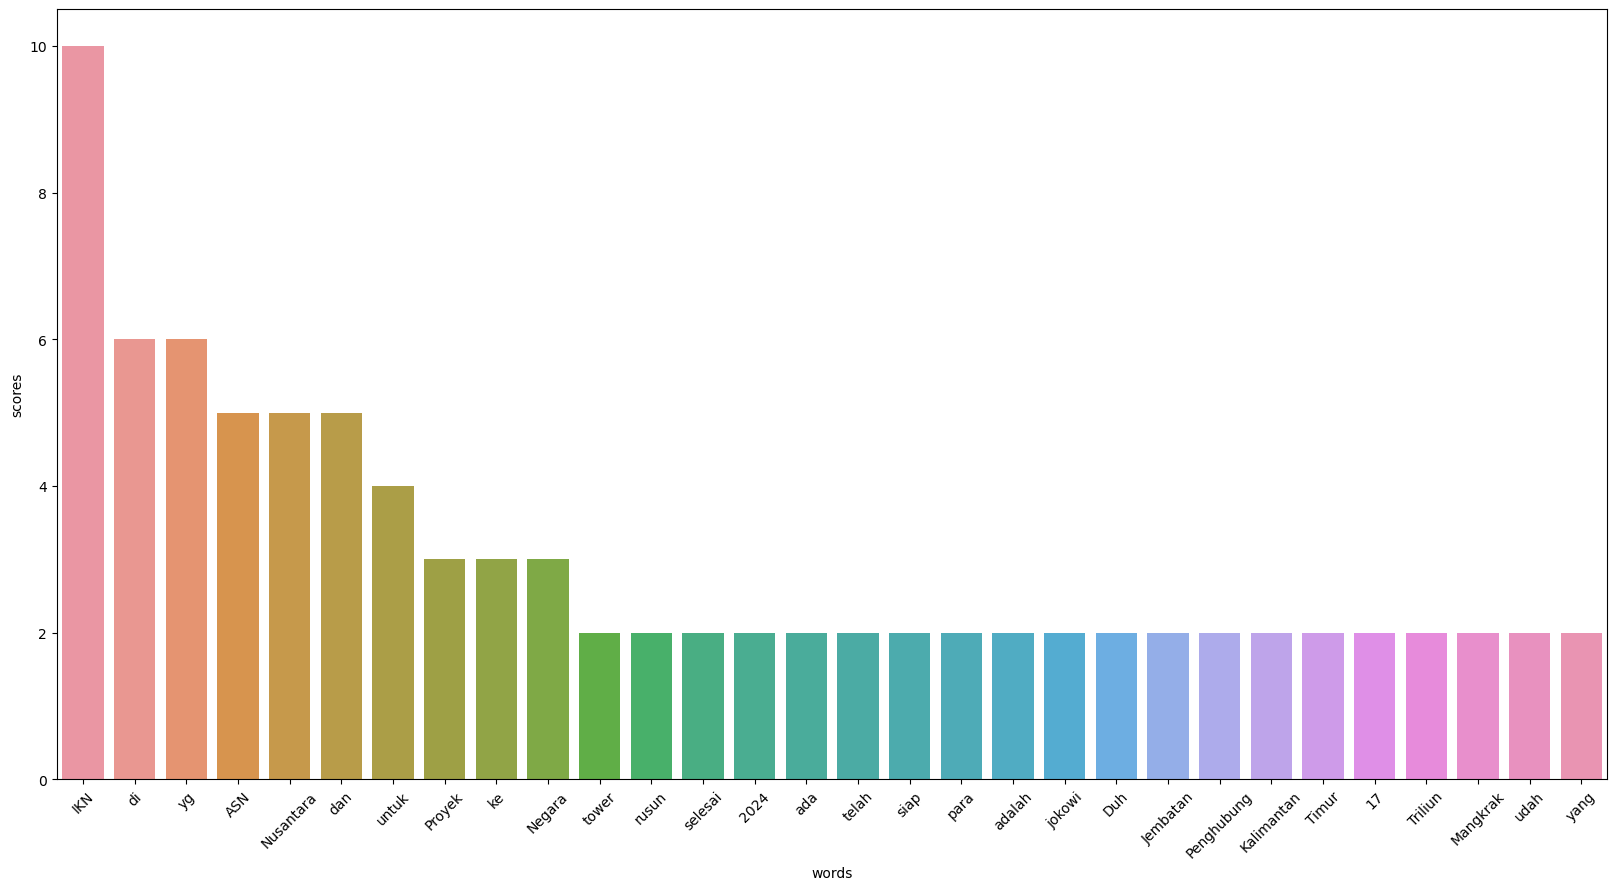

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores', data=neg_df)
plt.xticks(rotation=45)
plt.show()

In [91]:
# Plot with seaborn
neu_df = pd.DataFrame(most_common_neu_words.items(), columns=['words','scores'])

In [92]:
neu_df

words  scores
0              IKN     601
1               di     250
2               yg     168
3               ke     151
4              dan     133
5              ikn     101
6             yang     100
7        Nusantara      86
8             akan      70
9           pindah      67
10             itu      66
11           untuk      64
12             ada      62
13            jadi      59
14       Indonesia      59
15             mau      58
16             aja      55
17             ini      54
18            juga      50
19    strikebravob      49
20       PNSAbabil      49
21      Kalimantan      48
22             PNS      45
23              ga      44
24             gak      44
25            buat      43
26     pembangunan      43
27  BangPakatDayak      40
28            dari      40
29          proyek      37

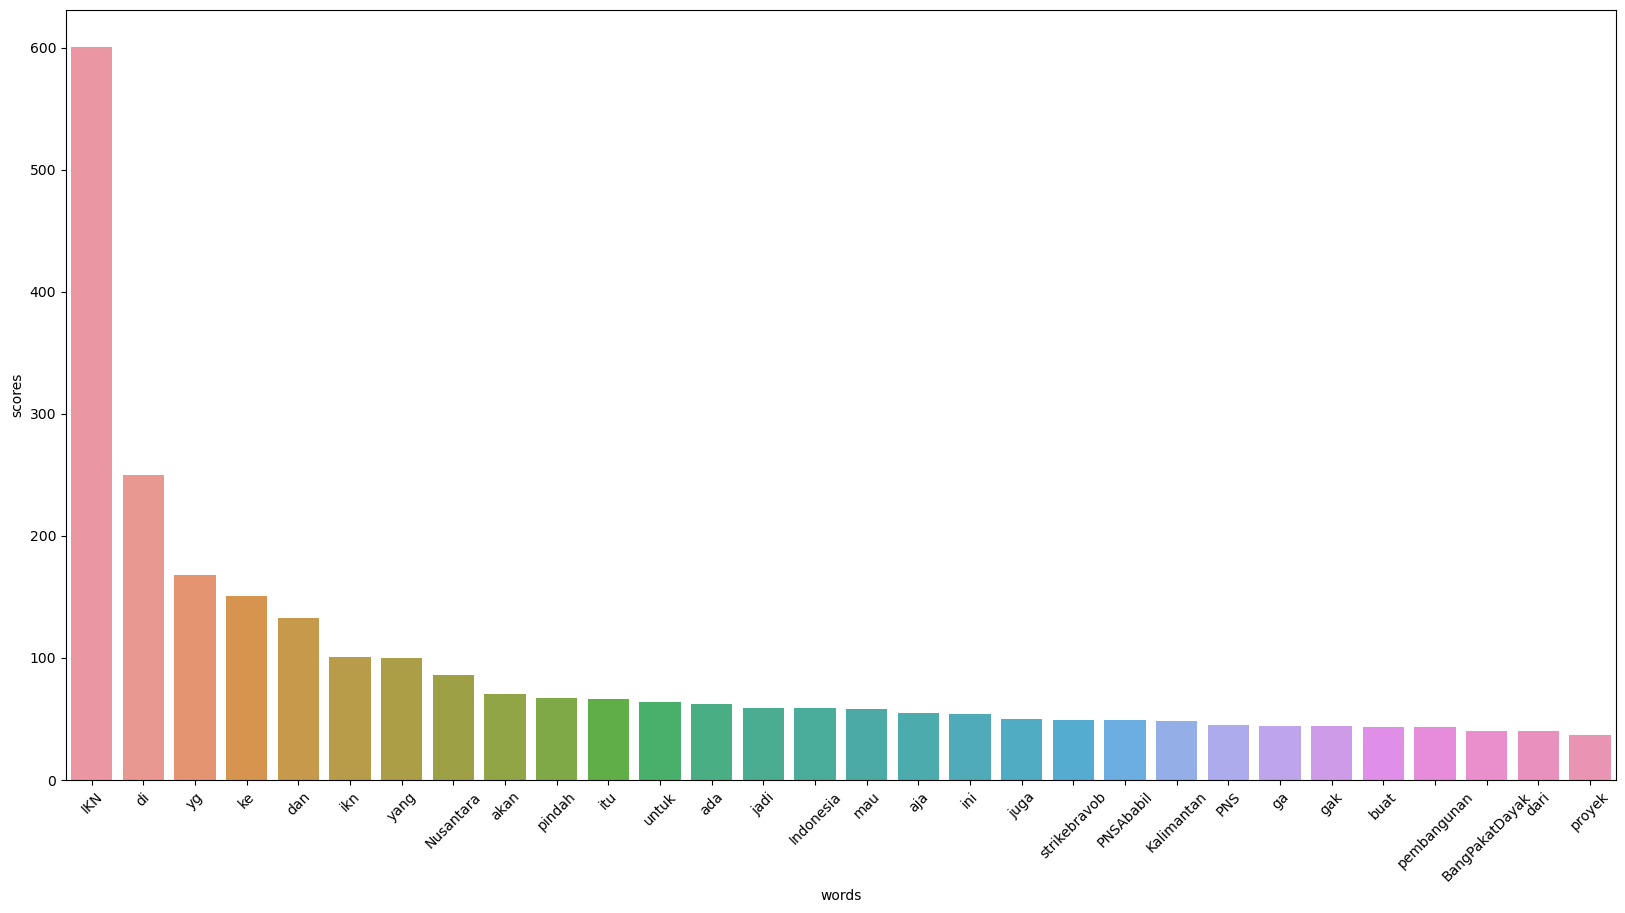

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores', data=neu_df)
plt.xticks(rotation=45)
plt.show()

In [94]:
# Word Cloud
from wordcloud import WordCloud

In [95]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [96]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neu_tokens)

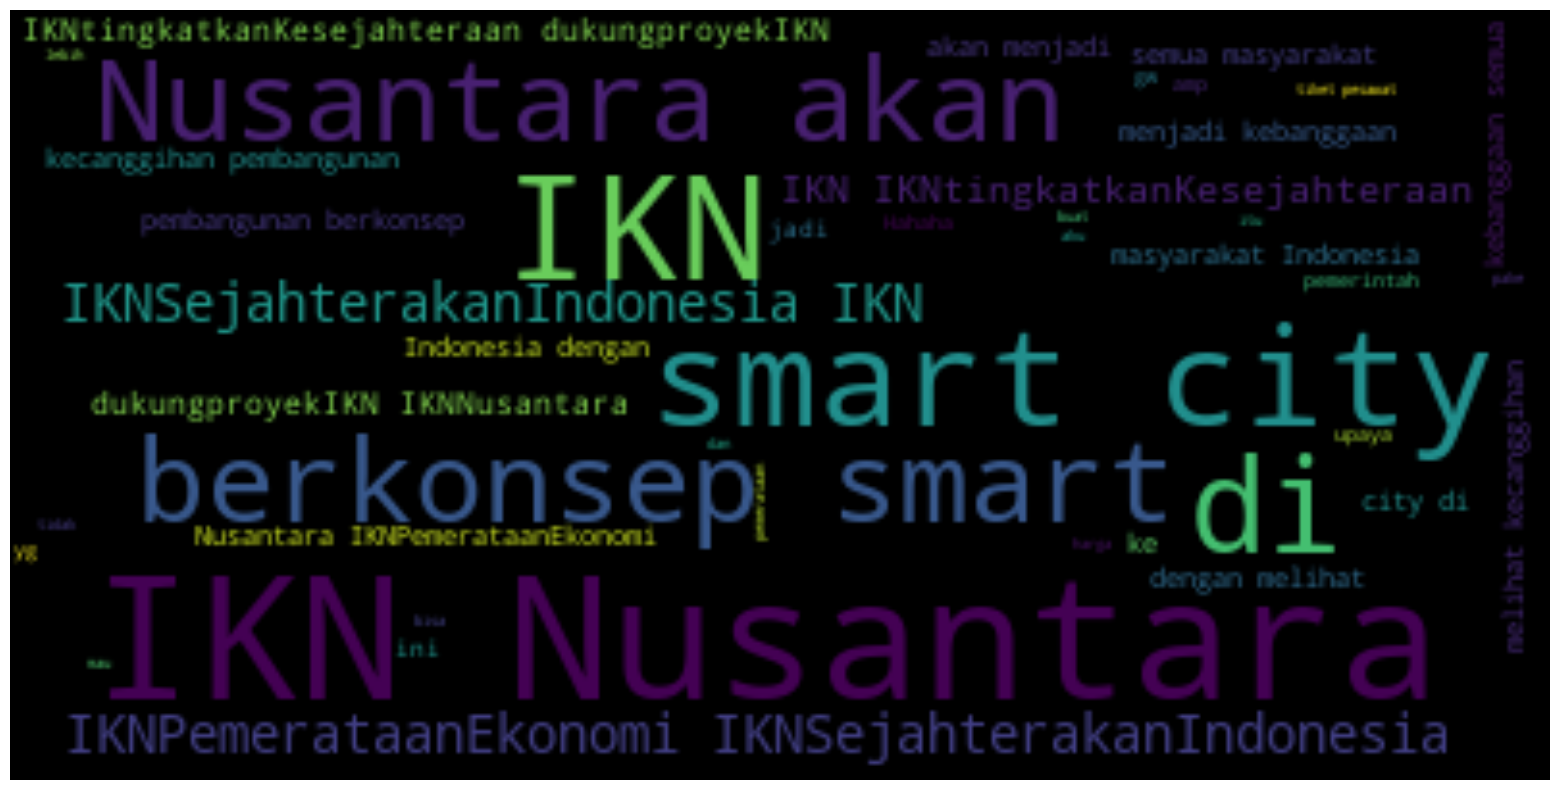

In [97]:
plot_wordcloud(pos_docx)

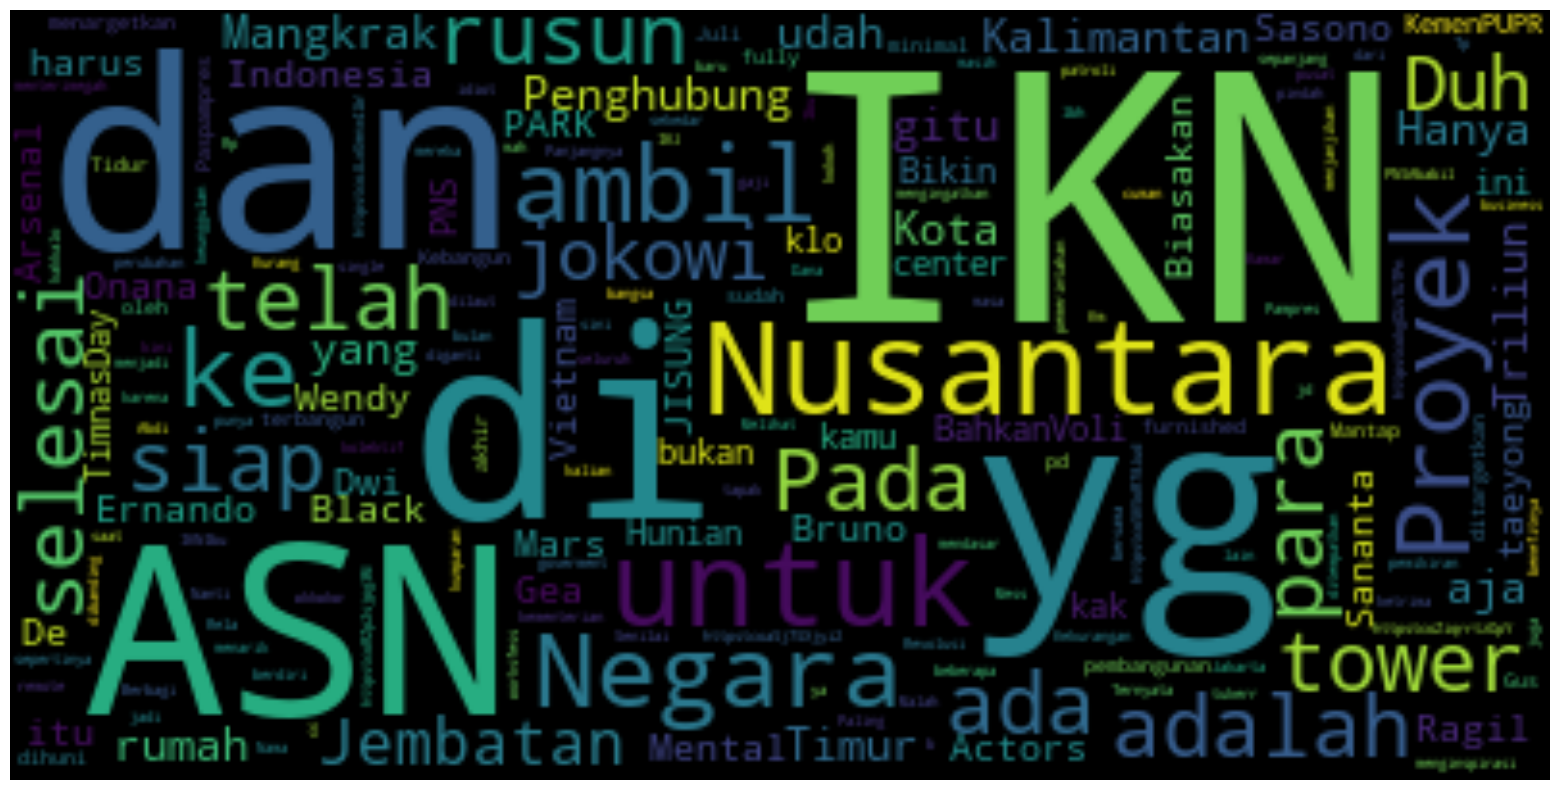

In [98]:
plot_wordcloud(neg_docx)

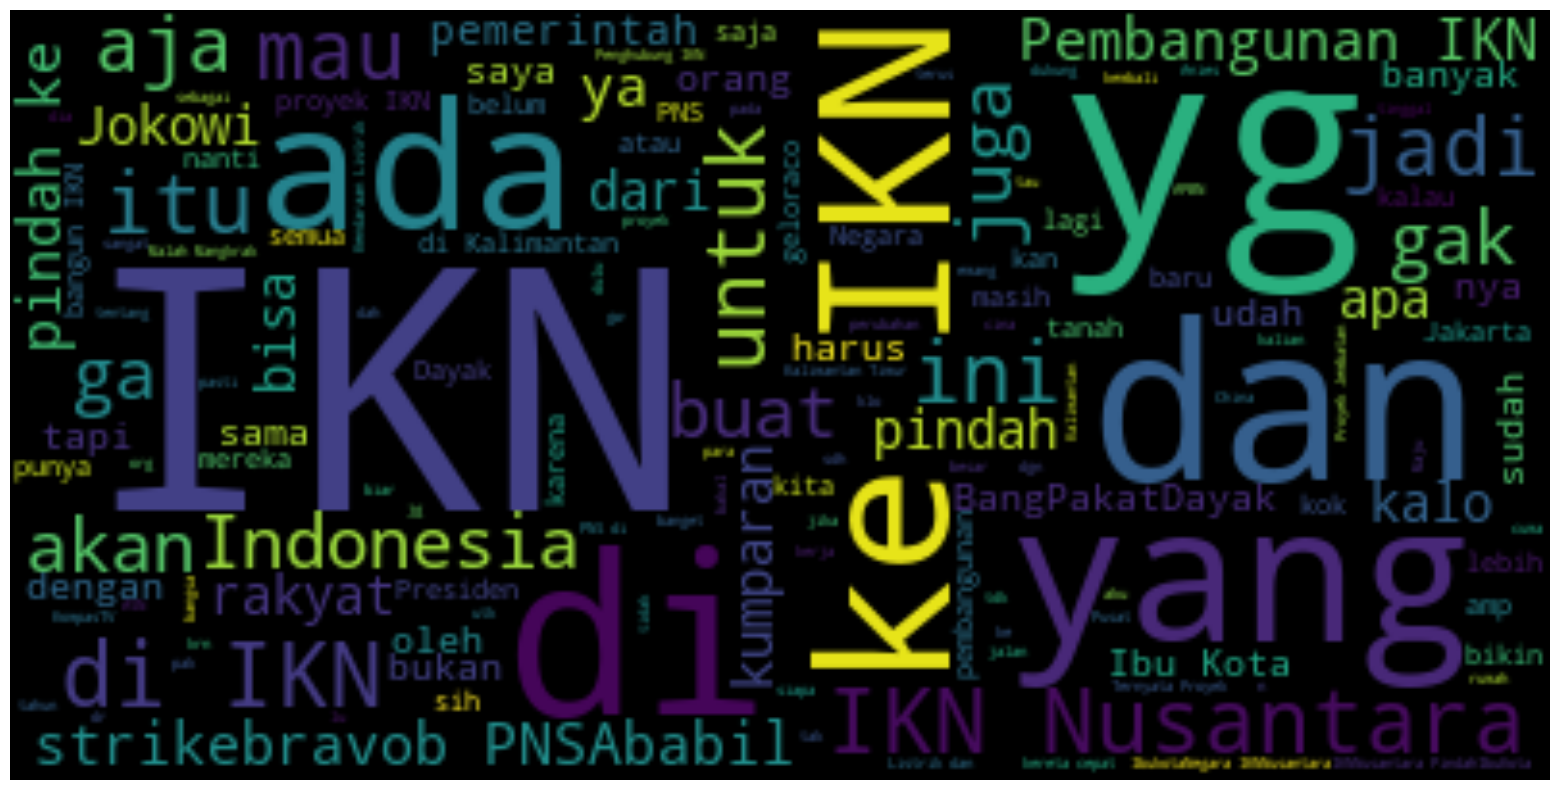

In [99]:
plot_wordcloud(neu_docx)

In [100]:
pip install -U notebook-as-pdf